In [8]:
import numpy as np

mean = [0.5, 0.5]
cov = [[0.02, 0.018], [0.018, 0.02]]  # Adjusted covariance 
matrixpoints = np.random.multivariate_normal(mean, cov, 50)
eigvals, eigvecs = np.linalg.eig(cov)

print(eigvecs, eigvals)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] [0.038 0.002]


/tmp/ipykernel_606310/1889079281.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  height, weight = np.random.multivariate_normal(mean, cov, 1000).T


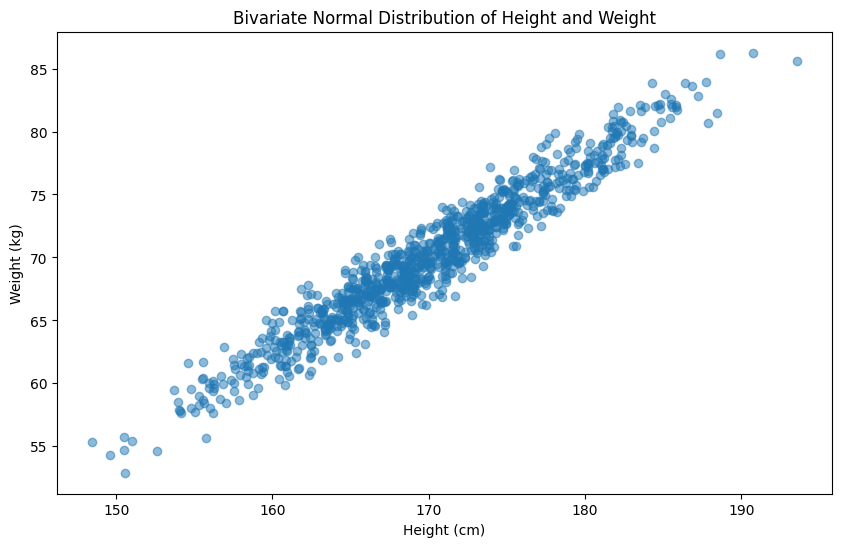

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and covariance matrix
mean = [170, 70]
cov = [[50, 40], [40, 30]]  # diagonal covariance

# Generate data
height, weight = np.random.multivariate_normal(mean, cov, 1000).T

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(height, weight, alpha=0.5)
plt.title("Bivariate Normal Distribution of Height and Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()


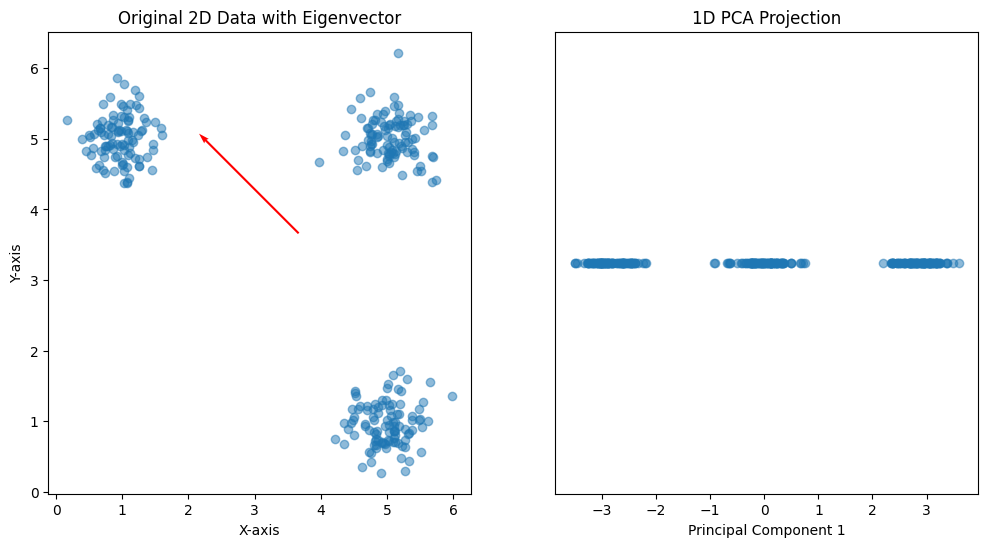

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)

# Generate three clusters
mean1 = [1, 5]   # Upper left corner
mean2 = [5, 5]   # Upper right corner
mean3 = [5, 1]   # Lower right corner
cov = [[0.1, 0], [0, 0.1]]  # Small covariance for tight clusters

cluster1 = np.random.multivariate_normal(mean1, cov, 100)
cluster2 = np.random.multivariate_normal(mean2, cov, 100)
cluster3 = np.random.multivariate_normal(mean3, cov, 100)

# Concatenate data
data = np.vstack((cluster1, cluster2, cluster3))

# Apply PCA to reduce to 1D
pca = PCA(n_components=1)
data_1d = pca.fit_transform(data)

# Get the principal component vector (eigenvector)
eigenvector = pca.components_[0]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot of original 2D data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title("Original 2D Data with Eigenvector")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Plot the eigenvector
origin = np.mean(data, axis=0)  # Origin at the mean of the data
plt.quiver(*origin, *eigenvector, color='r', scale=3, width=0.005)

# Scatter plot of 1D projected data
plt.subplot(1, 2, 2)
plt.scatter(data_1d, np.zeros_like(data_1d), alpha=0.5)
plt.title("1D PCA Projection")
plt.xlabel("Principal Component 1")
plt.yticks([])  # Hide y-axis

plt.show()


In [5]:
print(eigenvector)

[-0.70691125  0.70730226]


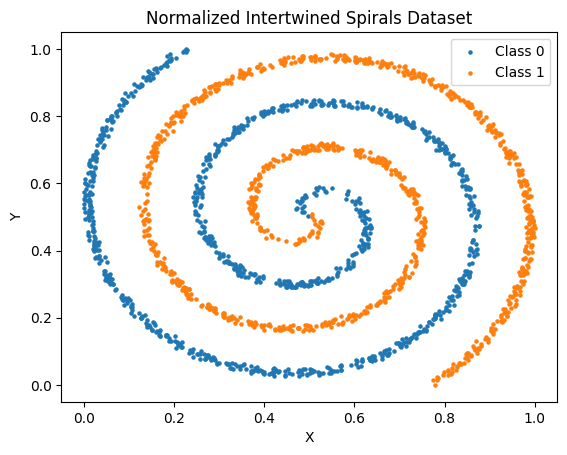

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def generate_intertwined_spirals(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    data1 = np.hstack((d1x, d1y))
    
    d2x = np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_points, 1) * noise
    data2 = np.hstack((d2x, d2y))
    
    data = np.vstack((data1, data2))
    labels = np.hstack((np.zeros(n_points), np.ones(n_points)))
    
    return data, labels

# Generate and normalize the dataset
n_points = 1000
data, labels = generate_intertwined_spirals(n_points)
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Plotting the normalized data to visualize it
plt.scatter(data_normalized[labels == 0][:, 0], data_normalized[labels == 0][:, 1], s=5, label='Class 0')
plt.scatter(data_normalized[labels == 1][:, 0], data_normalized[labels == 1][:, 1], s=5, label='Class 1')
plt.title("Normalized Intertwined Spirals Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Save the normalized data and labels to files for Manim script
np.savetxt("data/spiral.csv", data_normalized, delimiter=",")
np.savetxt("data/spiral_labels.csv", labels, delimiter=",")
